In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [144]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [145]:
df.shape

(319795, 18)

---

### 1 - Observando os dados.

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 1.2 - Observando se há dados nulos eduplicados.

In [147]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

----------

### 1.3 - Removendo dados duplicados.

In [148]:
df.duplicated().sum()

18078

In [149]:
df1 = df[df.duplicated() != True]

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

### 1.4 - Identificando quais os tipos de variáveis.

In [151]:
df1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [152]:
for num, c in enumerate(df.columns):
    print(f'Col {num + 1}, {c.upper()} : {df1[c].nunique()}')

Col 1, HEARTDISEASE : 2
Col 2, BMI : 3604
Col 3, SMOKING : 2
Col 4, ALCOHOLDRINKING : 2
Col 5, STROKE : 2
Col 6, PHYSICALHEALTH : 31
Col 7, MENTALHEALTH : 31
Col 8, DIFFWALKING : 2
Col 9, SEX : 2
Col 10, AGECATEGORY : 13
Col 11, RACE : 6
Col 12, DIABETIC : 4
Col 13, PHYSICALACTIVITY : 2
Col 14, GENHEALTH : 5
Col 15, SLEEPTIME : 24
Col 16, ASTHMA : 2
Col 17, KIDNEYDISEASE : 2
Col 18, SKINCANCER : 2


In [153]:
df = df1
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [154]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [155]:
categoricas = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke',
    'DiffWalking', 'PhysicalActivity',
    'Asthma', 'KidneyDisease', 'SkinCancer'
]
categorica_parcial = ['Race','GenHealth','AgeCategory','Diabetic','Sex']

numericas = ['BMI','PhysicalHealth','MentalHealth','SleepTime']

## Obs: Aqui não é preciso extrair a primeira idade
    Preciso trabalhar com a faixa de idade.

In [156]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [157]:
df['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [158]:
len(df['AgeCategory'].unique())

13

In [159]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [160]:
df['Race'].value_counts()

White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64

In [161]:
len(df['Race'].unique())

6

In [162]:
df['GenHealth'].value_counts()

Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64

In [163]:
#AgeCategory_ = pd.get_dummies(df['AgeCategory'], prefix='AgeCategorye')

In [164]:
#Race_ = pd.get_dummies(df['Race'], prefix='Race')

In [165]:
#GenHealth_ = pd.get_dummies(df['GenHealth'], prefix='GenHealth')

In [166]:
#Diabetic = pd.get_dummies(df['Diabetic'], prefix='Diabetic')

In [167]:
#Sex = pd.get_dummies(df['Sex'], prefix='Sex')

___

### 1.5 -  Trabalhando as variáveis categóricas.

In [168]:
df2 = df

In [169]:
categoricas

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [170]:
df2['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [171]:
for c in df2.columns:
    if c in categoricas:
        print(f'{c} : {df2[c].unique()}')

HeartDisease : ['No' 'Yes']
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
DiffWalking : ['No' 'Yes']
PhysicalActivity : ['Yes' 'No']
Asthma : ['Yes' 'No']
KidneyDisease : ['No' 'Yes']
SkinCancer : ['Yes' 'No']


In [172]:
for c in df2.columns:
    if c in categoricas:
        df2[c] = df2[c].map({'No' : 0, 'Yes' : 1})

In [173]:
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,No,0,Good,12.0,0,0,0


### Tratando as categoricas parciais.

In [174]:
categorica_parcial

['Race', 'GenHealth', 'AgeCategory', 'Diabetic', 'Sex']

In [175]:
for c in df2.columns:
    if c in categorica_parcial:
        print(f'{c} : {df[c].unique()}')

Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [176]:
df2['Sex'] = df2['Sex'].map({'Female': 0,  'Male': 1})

df2['AgeCategory'] = df2['AgeCategory'].map({'55-59' : 8,
                                             '80 or older' : 13, 
                                             '65-69' : 10, 
                                             '75-79' : 11,
                                             '40-44' : 5,
                                             '70-74' : 11, 
                                             '60-64' : 9,
                                             '50-54' : 7,
                                             '45-49' : 6,
                                             '18-24' : 1,
                                             '35-39' : 4,
                                             '30-34' : 3,
                                             '25-29' : 2})

df2['Race'] = df2['Race'].map({'White' : 1, 'Black': 2, 'Asian': 3,
                               'American Indian/Alaskan Native' : 4,
                               'Other' : 5, 'Hispanic' : 6})

df2['Diabetic'] = df2['Diabetic'].map({'Yes' : 1, 'No': 2 ,'No, borderline diabetes' : 3,'Yes (during pregnancy)' : 4})

df2['GenHealth'] = df2['GenHealth'].map({'Very good' : 4, 'Fair' : 2 , 'Good' : 3, 'Poor': 1 ,'Excellent' : 5})

In [177]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,1,2,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,1,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,1,2,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,6,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,6,2,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,6,2,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,6,2,0,3,12.0,0,0,0


---------

### 1.5 - Resolvendo o problema da coluna AgeCategory.

In [178]:
#aux = df['AgeCategory'].map(lambda x : x.split('-')[0])

In [179]:
#aux = aux.map(lambda x : x.split(' ')[0])

In [180]:
#aux = aux.apply(lambda x : np.int32(x))
#aux

In [181]:
#df['AgeCategory'] = aux
#df.head()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

In [183]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,0.090353,28.441970,0.422267,0.071527,0.039984,3.572298,4.121475,0.147009,0.470792,7.440757,1.773808,1.904874,0.763669,3.553628,7.084559,0.141361,0.039030,0.097084
std,0.286687,6.468134,0.493921,0.257704,0.195923,8.140656,8.128288,0.354115,0.499147,3.506578,1.600400,0.426407,0.424828,1.047515,1.467122,0.348394,0.193667,0.296073
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.650000,1.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,10.000000,1.000000,2.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,4.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

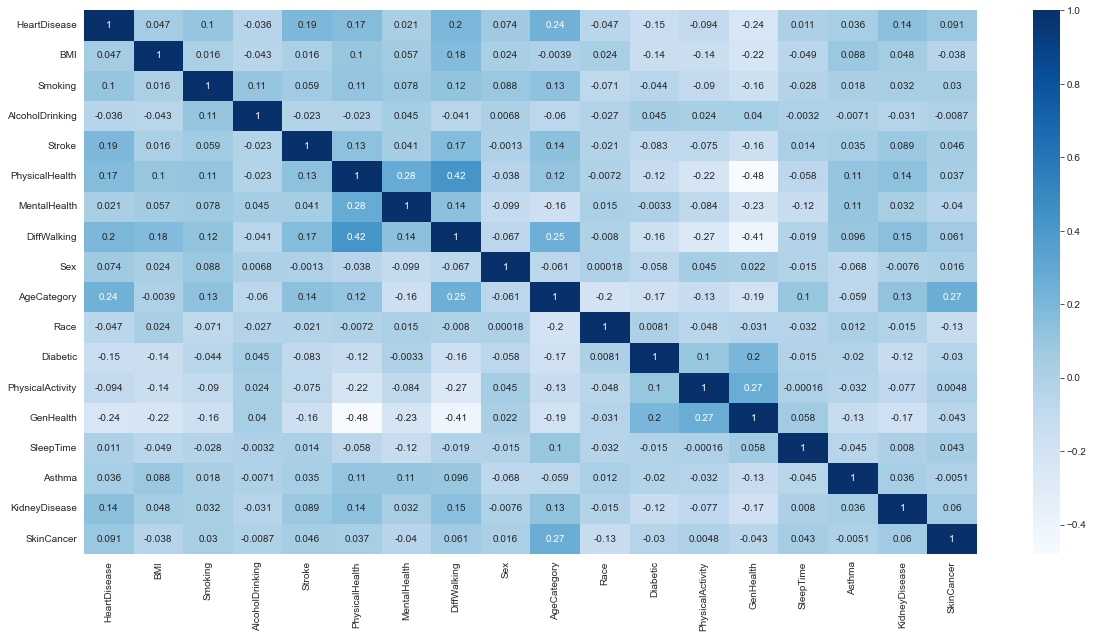

In [184]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

----

### 1.6 - Mmostrando graficamente todas as variáveis numéricas.
### Detectando Outliers.

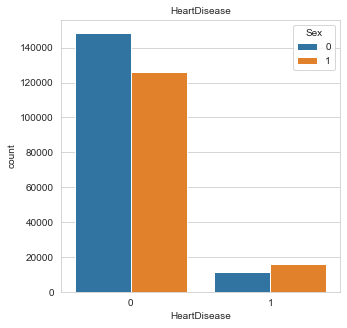

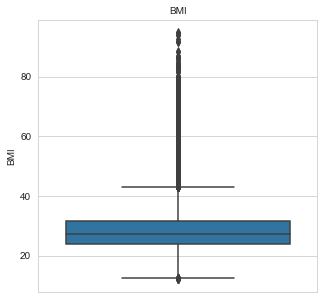

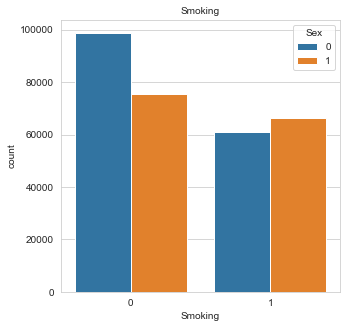

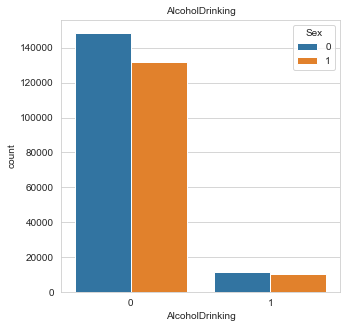

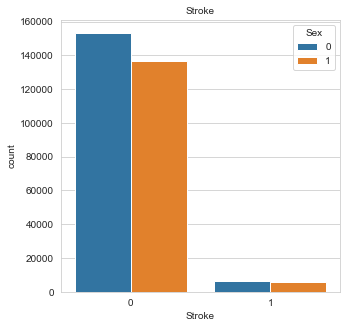

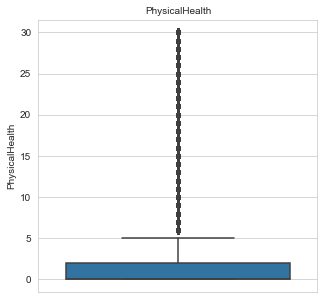

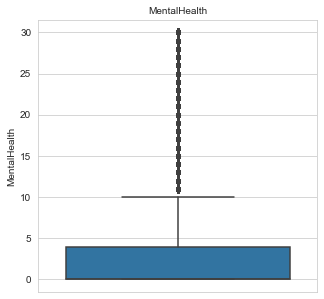

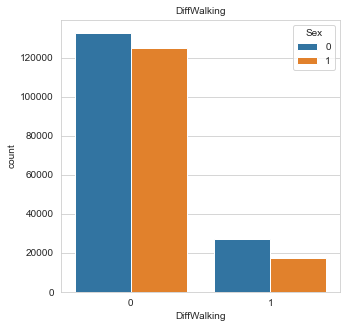

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

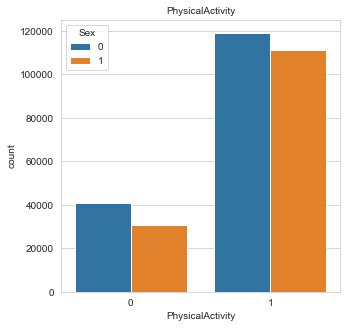

<Figure size 360x360 with 0 Axes>

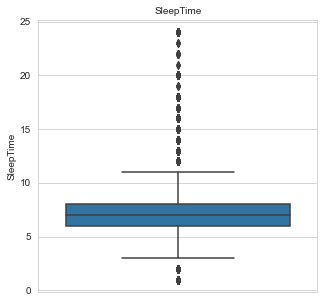

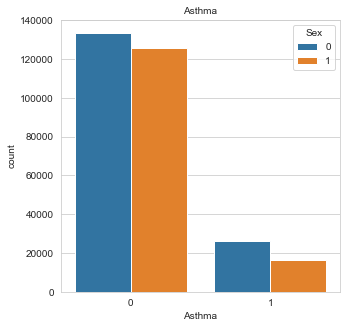

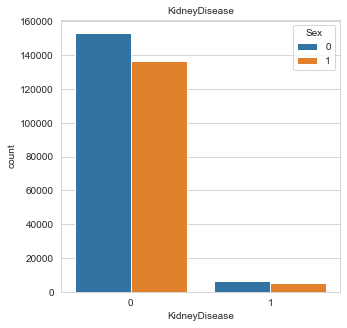

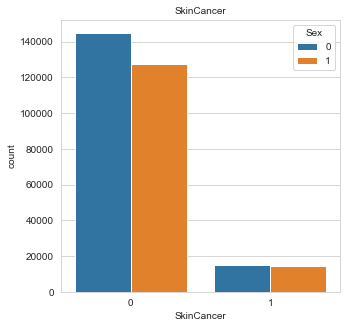

In [185]:
for num, c in enumerate(df.columns):
    
    plt.figure(figsize=(5, 5))
    if c in numericas:
        plt.title(f'{c}', fontsize = 10)
        sns.boxplot(y=df[c], hue=df['Sex'])
    if c in categoricas:
        plt.title(f'{c}', fontsize = 10)
        sns.countplot(x=df[c], hue=df['Sex'])

In [186]:
#(df[df['AgeCategory'] > np.mean(df['AgeCategory'])]

In [187]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,1,2,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,1,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,1,2,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,6,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,6,2,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,6,2,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,6,2,0,3,12.0,0,0,0


--------

In [188]:

import catboost

from sklearn.model_selection import train_test_split #

from sklearn import model_selection, tree, preprocessing, metrics, linear_model #

from sklearn.svm import LinearSVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier #
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression #

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier #
from catboost import CatBoostClassifier, Pool, cv

In [189]:
X = df.iloc[:,1 : ]
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,13,1,2,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,2,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,1,2,0,3,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,5,1,2,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,9,6,1,0,2,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,4,6,2,1,4,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,6,6,2,1,3,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,2,6,2,0,3,12.0,0,0,0


In [190]:
#y = df.iloc[:,0:1]
y = df['HeartDisease']
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int64

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [217]:
def func_acuracia(algoritmo, X_train, y_train, vc=2):
    
    modelo = algoritmo.fit(X_train, y_train)
    
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs= -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    print(f'Acurácia: {acuracia} %')
    print(f'Acurácia validação Cruzada : {acuracia_vc} %')
    


# DecisionTreeClassifier

In [208]:
func_acuracia(DecisionTreeClassifier(), X_train, y_train, 10)

Acurácia: 99.68 %
Acurácia validação Cruzada : 85.49 %


## RandomForestClassifier

In [212]:
func_acuracia(RandomForestClassifier(), X_train, y_train, 5)

Acurácia: 99.68 %
Acurácia validação Cruzada : 90.02 %


## SGDClassifier

In [215]:
func_acuracia(SGDClassifier(), X_train, y_train, 5)

Acurácia: 91.04 %
Acurácia validação Cruzada : 90.84 %


## LogisticRegression

In [226]:
func_acuracia(LogisticRegression(max_iter=1000), X_train, y_train)

Acurácia: 91.11 %
Acurácia validação Cruzada : 91.11 %


## GradientBoostingClassifier

In [227]:
func_acuracia(GradientBoostingClassifier(n_estimators=1000), X_train, y_train)

Acurácia: 91.45 %
Acurácia validação Cruzada : 91.09 %
